In [1]:
#tensorflow
import tensorflow as tf
from tensorflow.python.client import device_lib

#keras
import keras
from keras.backend.tensorflow_backend import set_session
from keras import models
from keras import layers
from keras import regularizers
from keras import backend as K
from keras.optimizers import RMSprop
from keras import callbacks

#numpy
import numpy as np

#matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

import math as math

#time
import time

Using TensorFlow backend.


In [2]:
config = tf.ConfigProto()
# dynamically grow the memory used on the GPU
config.gpu_options.allow_growth = True  
config.log_device_placement = False
sess = tf.Session(config=config)
set_session(sess)
print(tf.__version__)
print(keras.__version__)
print(device_lib.list_local_devices())

1.10.0
2.2.4
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16461458747910137466
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4960052838
locality {
  bus_id: 1
  links {
  }
}
incarnation: 3778726475036629895
physical_device_desc: "device: 0, name: GeForce GTX 1060, pci bus id: 0000:02:00.0, compute capability: 6.1"
]


In [90]:
def get_data(amount = 2, start=0):
    my_point = np.linspace(start* math.pi, 2*(start + amount) * math.pi, num= (20 * amount * math.pi * 90)//20*20)
    
    my_classification = np.asarray([math.sin(x) for x in my_point]).astype('float32')
    
    my_point = my_point.reshape(int(len(my_point)/20) ,20, 1)
    my_classification = my_classification.reshape(int(len(my_classification)/20) ,20, 1)
    
    return (my_point , my_classification)

In [91]:
point,classification = get_data(amount=2)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


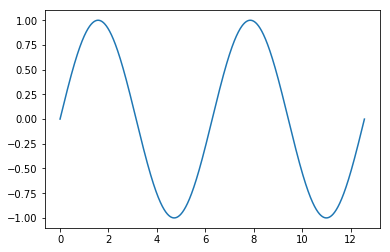

In [100]:
plt.plot(point.reshape(point.shape[0]*point.shape[1]) , classification.reshape(point.shape[0]*point.shape[1]))
plt.show()

In [63]:
print(point.shape)

(565, 20)


In [95]:
model = models.Sequential()
model.add(layers.CuDNNLSTM(28, input_shape=(point.shape[1:]), return_sequences=True))
model.add(layers.Dropout(0.2))
model.add(layers.CuDNNLSTM(28, return_sequences=True))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='sigmoid', input_shape=(1,)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1 , activation=None))
model.compile(loss='mean_squared_error', optimizer='SGD', metrics=['mae'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cu_dnnlstm_6 (CuDNNLSTM)     (None, 20, 28)            3472      
_________________________________________________________________
dropout_7 (Dropout)          (None, 20, 28)            0         
_________________________________________________________________
cu_dnnlstm_7 (CuDNNLSTM)     (None, 20, 28)            6496      
_________________________________________________________________
dropout_8 (Dropout)          (None, 20, 28)            0         
_________________________________________________________________
dense_13 (Dense)             (None, 20, 10)            290       
_________________________________________________________________
dropout_9 (Dropout)          (None, 20, 10)            0         
_________________________________________________________________
dense_14 (Dense)             (None, 20, 1)             11        
Total para

In [96]:
start = time.time()
history  = model.fit(point, 
                     classification, 
                     epochs=100, 
                     batch_size=8, 
                     validation_split=0.2, 
                     shuffle=True
                    )
print("It took:", time.time() - start)

Train on 452 samples, validate on 113 samples
Epoch 1/100
452/452 [==============================] - 3s 7ms/step - loss: 0.5807 - mean_absolute_error: 0.6226 - val_loss: 0.7535 - val_mean_absolute_error: 0.8217
Epoch 2/100
452/452 [==============================] - 1s 2ms/step - loss: 0.4980 - mean_absolute_error: 0.6043 - val_loss: 0.9058 - val_mean_absolute_error: 0.9098
Epoch 3/100
452/452 [==============================] - 1s 2ms/step - loss: 0.4845 - mean_absolute_error: 0.5963 - val_loss: 0.8913 - val_mean_absolute_error: 0.9017
Epoch 4/100
452/452 [==============================] - 1s 2ms/step - loss: 0.4684 - mean_absolute_error: 0.5896 - val_loss: 1.0100 - val_mean_absolute_error: 0.9653
Epoch 5/100
452/452 [==============================] - 1s 2ms/step - loss: 0.4708 - mean_absolute_error: 0.5875 - val_loss: 0.8360 - val_mean_absolute_error: 0.8704
Epoch 6/100
452/452 [==============================] - 1s 2ms/step - loss: 0.4696 - mean_absolute_error: 0.5900 - val_loss: 0.851

452/452 [==============================] - 1s 2ms/step - loss: 0.3003 - mean_absolute_error: 0.4575 - val_loss: 1.0760 - val_mean_absolute_error: 1.0004
Epoch 50/100
452/452 [==============================] - 1s 2ms/step - loss: 0.2924 - mean_absolute_error: 0.4497 - val_loss: 1.1713 - val_mean_absolute_error: 1.0468
Epoch 51/100
452/452 [==============================] - 1s 2ms/step - loss: 0.2905 - mean_absolute_error: 0.4471 - val_loss: 1.1549 - val_mean_absolute_error: 1.0388
Epoch 52/100
452/452 [==============================] - 1s 2ms/step - loss: 0.2865 - mean_absolute_error: 0.4424 - val_loss: 1.1425 - val_mean_absolute_error: 1.0326
Epoch 53/100
452/452 [==============================] - 1s 1ms/step - loss: 0.2816 - mean_absolute_error: 0.4380 - val_loss: 1.1558 - val_mean_absolute_error: 1.0388
Epoch 54/100
452/452 [==============================] - 1s 2ms/step - loss: 0.2746 - mean_absolute_error: 0.4337 - val_loss: 1.1374 - val_mean_absolute_error: 1.0297
Epoch 55/100
452/

452/452 [==============================] - 1s 1ms/step - loss: 0.2063 - mean_absolute_error: 0.3616 - val_loss: 1.3200 - val_mean_absolute_error: 1.1123
Epoch 99/100
452/452 [==============================] - 1s 1ms/step - loss: 0.2029 - mean_absolute_error: 0.3589 - val_loss: 1.4845 - val_mean_absolute_error: 1.1839
Epoch 100/100
452/452 [==============================] - 1s 1ms/step - loss: 0.2041 - mean_absolute_error: 0.3587 - val_loss: 1.4160 - val_mean_absolute_error: 1.1547
It took: 79.42541432380676


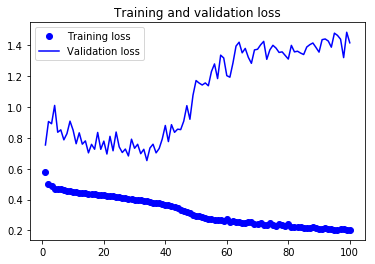

In [97]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)


plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [103]:
test_point, test_classification = get_data(start=0, amount=2)
(test_loss, test_acc) = model.evaluate(test_point, test_classification)
print("Loss: ", test_loss)
print("Accuracy: ", test_acc)

565/565 [==============================] - 0s 184us/step
Loss:  0.40532348303668264
Accuracy:  0.47917216256656475


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


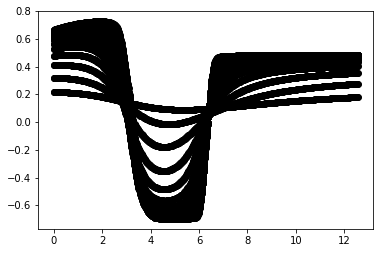

In [106]:
pred_classification = model.predict(test_point)

#plt.plot(point.reshape(point.shape[0]*point.shape[1]) , classification.reshape(point.shape[0]*point.shape[1]))


plt.plot(test_point.reshape(test_point.shape[0]*point.shape[1]) , pred_classification.reshape(test_point.shape[0]*point.shape[1]), 'ko')
#plt.plot(test_point.reshape(test_point.shape[0]*point.shape[1]) , test_classification.reshape(test_point.shape[0]*point.shape[1]), 'bx')
plt.show()